# Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here you will be provided with Automobile insurance claim dataset.

Lets check the dataset first and import some important library

In [24]:
import pandas as pd
import numpy as np

In [25]:
df=pd.read_csv('Auto_insurance.csv')#read the data from file
df.head()#display first five rows

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [26]:
df.shape#displaying matrix of dataset so here 26 Attributes are present

(9134, 26)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

in the dataset having mix of data numerical as well as categorical

in the attributes some of attributes are very important
here the goal of this project to make prediction model of insurence claim
for that we need to know basic information of customer i.e Income,Monthly premium,any kind of acciedent that total amount claim of amount,vehicle class etc.

In [28]:
df.isnull().sum()#To check missing or null values

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

good news for us there is no missing or null data in dataset

In [29]:
df.describe()#now to find out the specification of data

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Here we seperate the categorical and numerical data from dataset 
first we seperate some numerical data then we hwill have to seperate the categorical data.

In [30]:
df_new=df[['Claim Amount','Income','Monthly Premium Auto','Months Since Policy Inception','Number of Open Complaints',
          'Number of Policies','Total Claim Amount']].copy()
df_new.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,5,0,1,384.811147
1,697.953590,0,94,42,0,8,1131.464935
2,1288.743165,48767,108,38,0,2,566.472247
3,764.586183,0,106,65,0,7,529.881344
4,281.369258,43836,73,44,0,1,138.130879


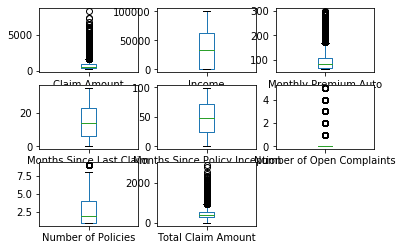

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(3,3))
plt.show()

here we can see that outliers are present in the claim and total claim amount

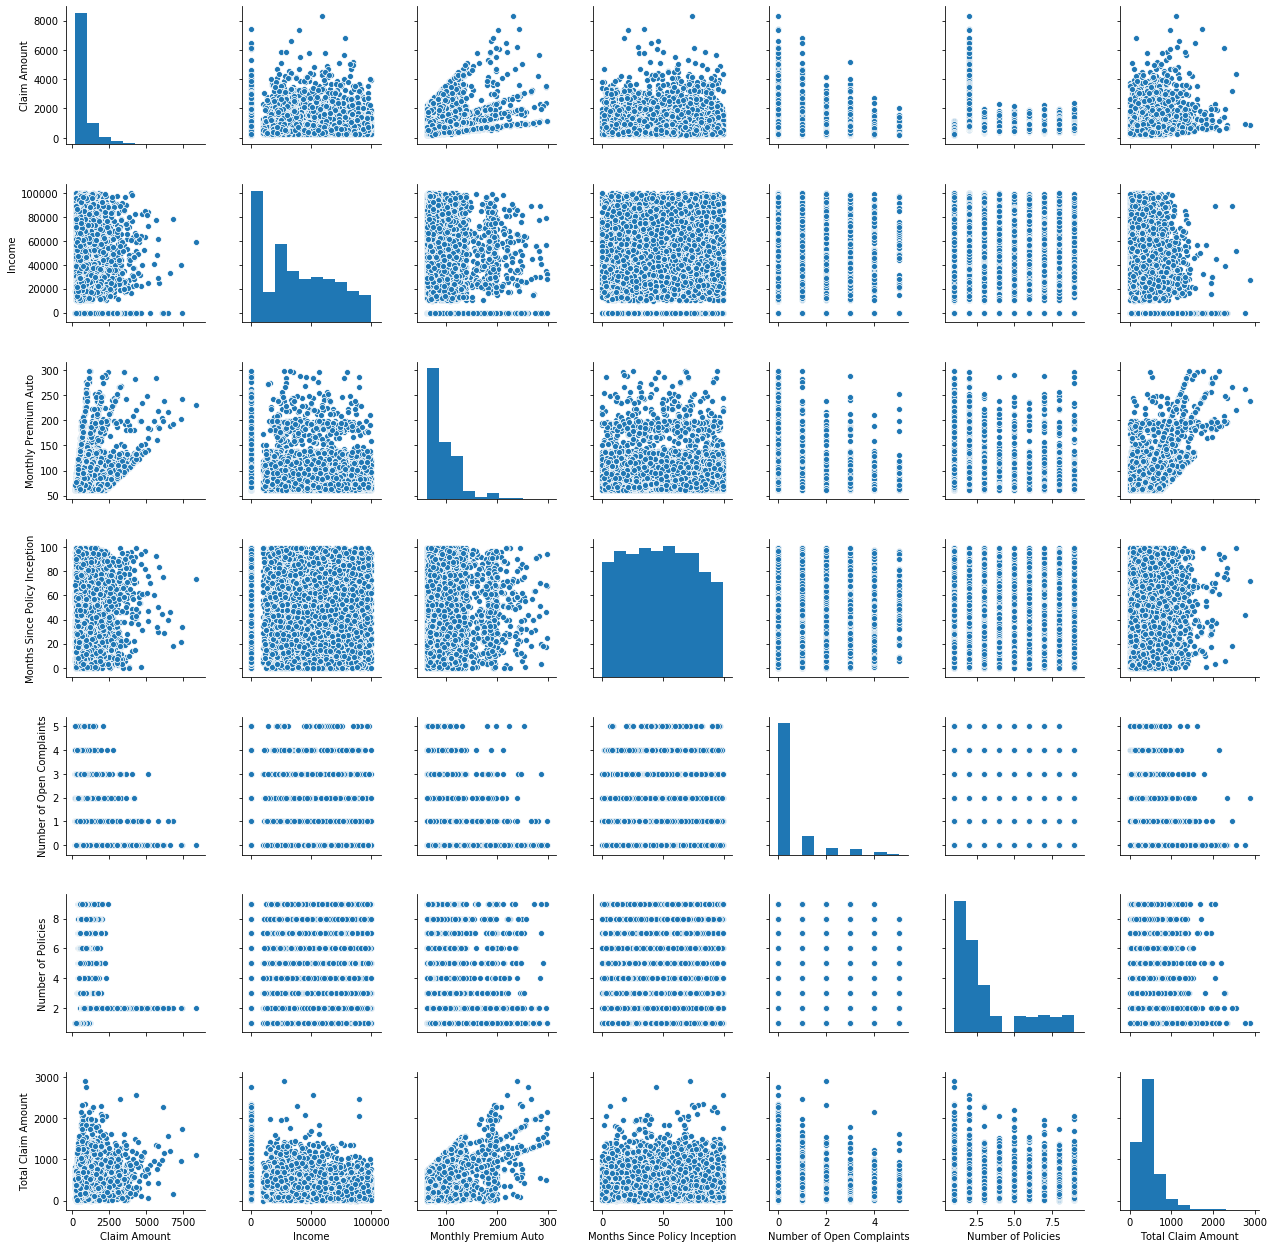

In [57]:
sns.pairplot(df_new)

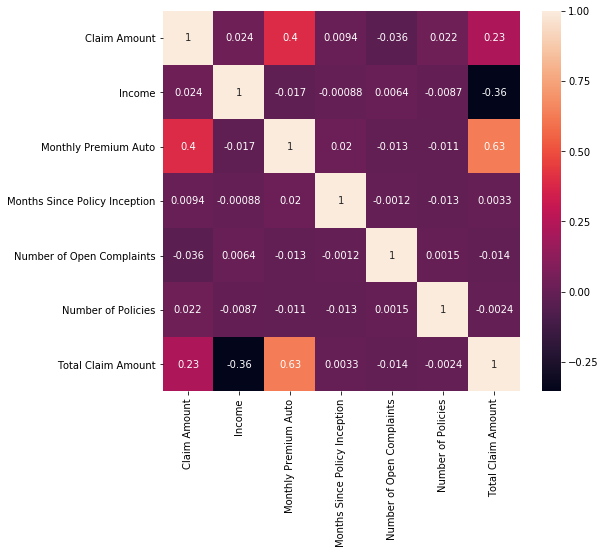

In [59]:
corr_hmap=df_new.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Here we can see that the strong relation between Total claim and Monthly premium
less in Income and total claim

In [32]:
df_cat=df[['Response','EmploymentStatus','Vehicle Class','Vehicle Size']].copy()
df_cat.head()

,Response,EmploymentStatus,Vehicle Class,Vehicle Size
0,No,Employed,Two-Door Car,Medsize
1,No,Unemployed,Four-Door Car,Medsize
2,No,Employed,Two-Door Car,Medsize
3,No,Unemployed,SUV,Medsize
4,No,Employed,Four-Door Car,Medsize


now lets take categorical dataset and convert it into a numerical values

In [33]:
num_val={'Yes':1,'No':0}
df_cat['Response']=df_cat["Response"].apply(lambda x:num_val[x])
df_cat.head()

,Response,EmploymentStatus,Vehicle Class,Vehicle Size
0,0,Employed,Two-Door Car,Medsize
1,0,Unemployed,Four-Door Car,Medsize
2,0,Employed,Two-Door Car,Medsize
3,0,Unemployed,SUV,Medsize
4,0,Employed,Four-Door Car,Medsize


In [34]:
df_cat=pd.get_dummies(df_cat)
df_cat.head()

,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [37]:
df_final=pd.concat([df_new,df_cat],axis=1)#for combining numerical and categorical data for analysis
df_final.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,EmploymentStatus_Unemployed,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,56274,69,5,0,1,384.811147,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,94,42,0,8,1131.464935,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,1288.743165,48767,108,38,0,2,566.472247,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,0,106,65,0,7,529.881344,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,281.369258,43836,73,44,0,1,138.130879,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [38]:
df_final.tail()

,Claim Amount,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,EmploymentStatus_Unemployed,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
9129,2340.598798,71941,73,89,0,2,198.234764,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9130,309.651122,21604,79,28,0,1,379.200000,1,0,1,...,0,1,0,0,0,0,0,0,1,0
9131,816.389043,0,85,37,3,2,790.784983,0,0,0,...,1,1,0,0,0,0,0,0,1,0
9132,752.444244,21941,96,3,0,3,691.200000,0,0,1,...,0,1,0,0,0,0,0,1,0,0
9133,261.183687,0,77,90,0,1,369.600000,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [39]:
#PreProcessing the data
x = df_final[['Claim Amount', 'Income','Monthly Premium Auto','Months Since Policy Inception','Number of Open Complaints',
             'Number of Policies','Response','Vehicle Class_Four-Door Car','Vehicle Class_Luxury Car','Vehicle Class_Two-Door Car',
            'Vehicle Size_Medsize' ]]
y=df_final['Total Claim Amount']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=80)


In [43]:
#Applying ML Algorithm
Linear Regressor
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lm.score(x_train,y_train)


0.517015327517092

from Linear Regressor we are getting 51% Accuracy score

In [45]:
#Lets try with some other Algorithm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
alphas=np.array([1,0.1,0.01,0.0001,0])

In [47]:
model=Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.5138581881805325
1.0


In [49]:
#from KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.5474523250748227

In [50]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)

0.5226542522471852

Now from Adabooster ,gridsearchCV ,KNN regressor we are not getting appropriate accuracy score.
lets try some other regressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

Conclusion-In this prediction model we can say that Decision Tree and ExtraTree Regressor is the best Algorithm for this problem 


In [53]:
#Prediction Model
pred=dtr.predict(x_test)
print("Predicted result price:",pred)
print("actual price",y_test)

Predicted result price: [660.430456 481.025786 314.528138 ... 662.69318  612.300581 421.906803]
actual price 3523     660.430456
5070     481.025786
7043     302.400000
145      251.992083
8701     928.800000
6239    1080.000000
5998     350.400000
635      133.475315
4879     292.953446
4586     366.604732
8562     604.800000
8435     147.486454
1085     292.800000
4774     802.278237
8493     321.600000
4692     364.800000
8609     292.800000
4137     585.482275
8050     345.600000
4885     386.031248
8682     556.800000
5039      55.510526
955      136.787725
5819     350.400000
6390     243.598068
8803     159.383042
2382     326.400000
17       647.442031
4362     501.153571
4095     340.800000
           ...     
1920     242.491357
2573     446.751243
3262     672.000000
8158     251.152889
3504     561.600000
2798     314.044227
236      105.765111
4902     412.800000
1942     513.600000
5932     537.600000
2720     613.866905
5110     355.385287
4691     514.059402
6205       